## Cardio Good Fitness

### Objectives

* Create a customer profile for the different products offered
* Perform univariate and multivariate analysis on data
* Generate insights and provide recommendations to company on ways of targeting new customers

### Data Provided

 * Product - the model no. of the treadmill
 * Age - in no of years, of the customer
 * Gender - of the customer
 * Education - in no. of years, of the customer
 * Marital Status - of the customer
 * Usage - Avg. # times the customer wants to use the treadmill every week
 * Fitness - Self rated fitness score of the customer (5  *very fit, 1  *very unfit)
 * Income - of the customer
 * Miles - expected to run

In [7]:
# Import necessary Python libraries

import numpy as np
import pandas as pd
import seaborn as sns
import warnings

import matplotlib.pyplot as plt
# Graphs/plots will be included in the workbook and shown following the respective code 
%matplotlib inline 

# Ignore any Python warnings about updated library details, etc.
warnings.filterwarnings('ignore')

In [8]:
# Import the company data (csv)
data=pd.read_csv('C://Users//svenm//Documents//Data Science Training//Python Foundations//Project 1//CardioGoodFitness.csv')

In [9]:
# Create a copy of the data for easy reference & backup

df=data.copy()

In [76]:
# Inspect the top 10 lines of detail

df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


In [77]:
# Inspect the bottom 10 lines of detail

df.tail(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
170,TM798,31,Male,16,Partnered,6,5,89641,260
171,TM798,33,Female,18,Partnered,4,5,95866,200
172,TM798,34,Male,16,Single,5,5,92131,150
173,TM798,35,Male,16,Partnered,4,5,92131,360
174,TM798,38,Male,18,Partnered,5,5,104581,150
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


### Observations

- The Product column appears to be a SKU code
    - Further analysis needs to be performed to determine a count of unique SKUs in data and relationship to dataset
- Gender and Marital Status each appear to only offer two options in the data
- **Usage** appears to be a count of times per week the product is used, whereas **Miles** indicates expected miles to be run within that given week
    - Further exploration into this relationship could determine whether a strong correlation exists between them


In [78]:
# Inspect the shape of the dataset (rows/columns)

df.shape

(180, 9)

In [79]:
# Inspect the column data types and row/null counts of the datset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### Observations

- The Product column appears to be a SKU code
    - Further analysis needs to be performed to determine a count of unique SKUs in data and relationship to dataset
- Gender and Marital Status each appear to only offer two options in the data
- Usage appears to be a count of times per week the product is used, whereas Miles indicates expected miles to be run within that given week
    - Further exploration into this relationship could determine whether a strong correlation exists between them
- **There are 180 rows and 9 columns in the dataset**
- There is **no missing data**
- All columns excluding: Product, Gender, and Marital Status are numerical
    - **The non-numerical columns will be converted to Category data types**

In [80]:
# Change Product, Marital Status, and Gender to category

df['Product']=df.Product.astype('category')
df['MaritalStatus']=df.MaritalStatus.astype('category')
df['Gender']=df.Gender.astype('category')

In [81]:
# Check for NULLs - none expected

df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [82]:
# Inspect the column and data types again, ensuring all are numerical/categorical as desired
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


In [3]:
# Before diving too deep into the analysis run a Pandas Profiling report for quick summary insights

import pandas_profiling # Import the Pandas Profiling library

In [10]:
pandas_profiling.ProfileReport(df) # Run the profile report for the main dataframe 'df'

In [11]:
pandas_profiling.ProfileReport(df).to_file('Cardio GF Summary.html') # Save the report to separate html file for easier viewing (full screen)

### Observations

#### Variables

- As expected, there are 180 rows, 9 columns, and no missing values
- There is a slight disconnect between the count of Categorical columns in my observations above and what the Profile Report is identifying
    - **3 Categories/6 Numerical** vs. **4 Categories/5 Numerical** respectively
    - The different is how the **Fitness column** is being treated (**int64** in my analysis and **categorical** in the Profile Report)
    - **The Fitness column will be updated to categorical** so as to align with the results of the Profile Report
- There are 3 unique products in the dataset
    - **There is a clear favorite (the TM195)**, with product % splits as follows:
        - TM195: 44.4%
        - TM498: 33.3%
        - TM798: 22.2%
- The mean customer age is around 29 years, with a median age of 26
    - Although there are outliers in the dataset, ranging from **18 to 50 years**, the data is only **moderately skewed (score=.98)**
    - It is still worth noting that nearly **40% of the customers are in the ages of: 23-26**
- The bulk of the education data within the sample is comprised of two values:
    - 30% of customers have at 14 years and 47% have 16 years of education
    - This could be indicative of **12 years of regular schooling** plus either an additional **Associates (2 years) or Bachelor's (4 years)**
- There is a greater distribution of customers that are: 
    - **Male** vs. Female (58%/42%)
    - **Partnered (Married)** vs. Single (59%/41%)
- The majority of customers use the product/s **3 (38%) to 4 (29%) days a week**
- Over half the customers in the dataset **(54%) are at an average fitness level of 3**
- Average weekly miles ran is around 104, with a median of 94 and the lower 1st quantile running at least 66 miles a week
    - There are also extreme cases (outliers) ranging as high as 360 and as low as only 21 miles per week
- Customer Income has a mean of \\$53.7k and median of \\$50.6k
    - The **Skewness score of 1.29** indicates that the incomes are positive skewed with more outliers to the right side of distribution
    
#### Correlation

- There does appear to be some correlation between the following variables:
    - Miles ran per week and Fitness level
    - Miles ran per week and Usage
    - Income Earned and Education (years studied)
    - Income Earned and Age
- These all appear to be **relatively intuitive and expected** and will require further research into **whether or not they help in establishing Customer Profiles and/or generating insights/recommendations**

In [86]:
df['Fitness']=df.Fitness.astype('category') # Adjusting Fitness column to Categorical as reflected in Pandas Profile Report

In [87]:
# Analyzing the statistics behind the data (categorical values included)

df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.0,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,5.0,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,3.0,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,97.0,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,NaN,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,NaN,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,NaN,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,NaN,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,NaN,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,NaN,58668.000000,114.750000


In [133]:
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        y = p.get_y() + p.get_height()           # Hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage

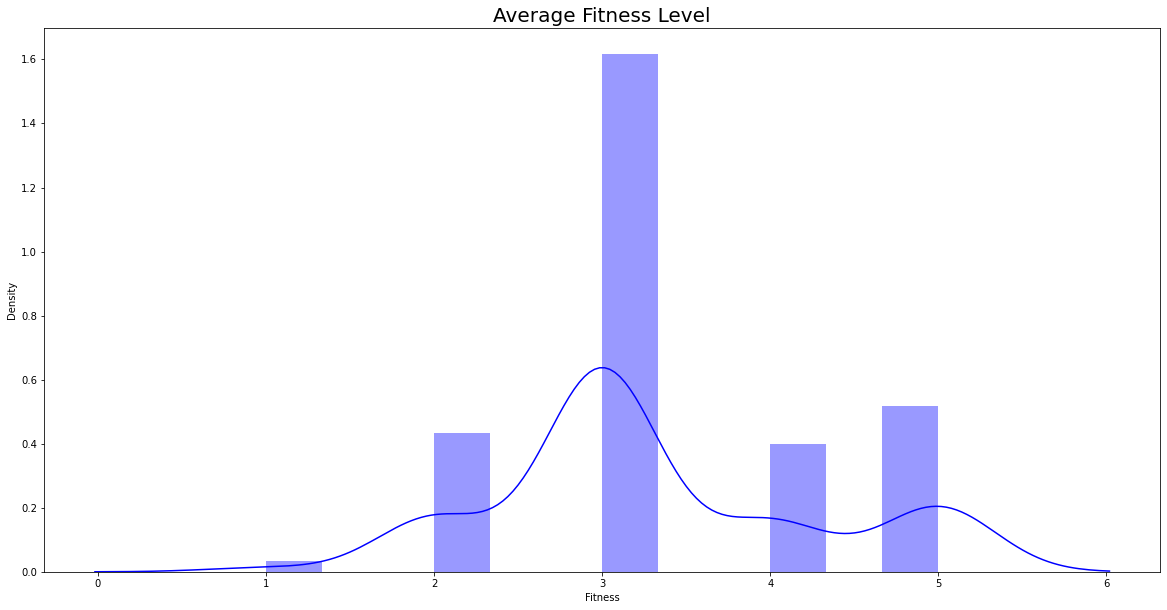

In [227]:
# Visually determine/confirm average Fitness Level

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.distplot(df['Fitness'],kde=True,color='blue')
plt.title('Average Fitness Level', fontsize=20);

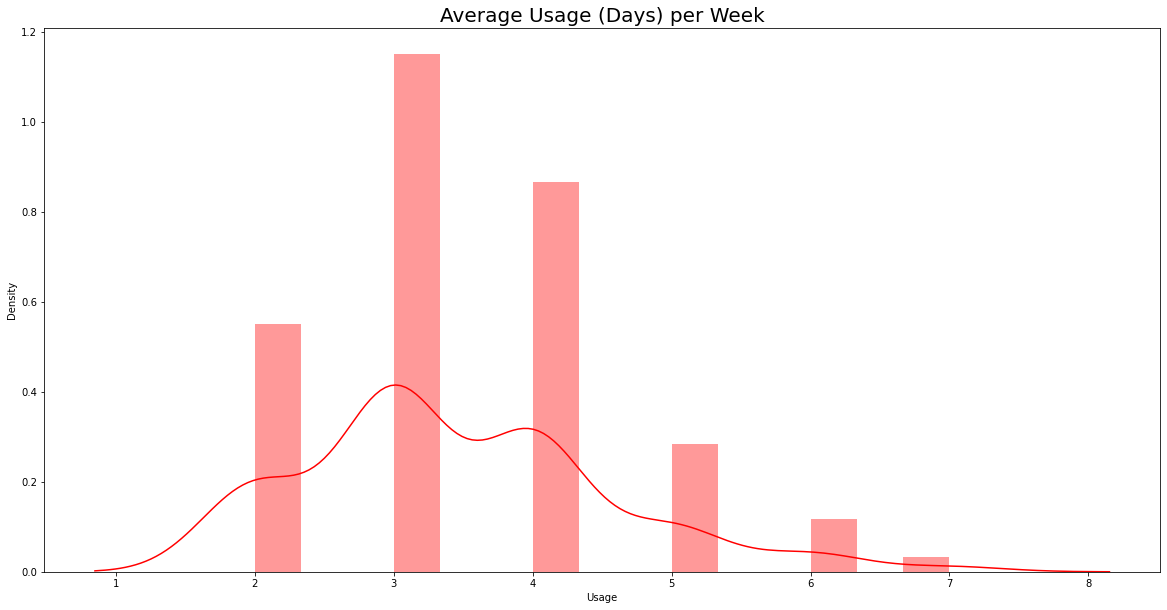

In [89]:
# Visually determine average Usage (Days per Week)

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.distplot(df['Usage'],kde=True,color='Red')
plt.title('Average Usage (Days) per Week', fontsize=20);

In [90]:
# Determine miles per day, per customer, based on weekly usage rates - convert to integer instead of float

WeeklyUsage=np.array(df['Usage'])
WeeklyMiles=np.array(df['Miles'])

AvgDayUsage=list(WeeklyMiles/WeeklyUsage)

df['Miles Per Use']=AvgDayUsage

df['Miles Per Use']=df['Miles Per Use'].astype('int64')

In [91]:
df.info() # Check the data to ensure the new column has been added and converted to integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   Miles Per Use  180 non-null    int64   
dtypes: category(4), int64(6)
memory usage: 9.8 KB


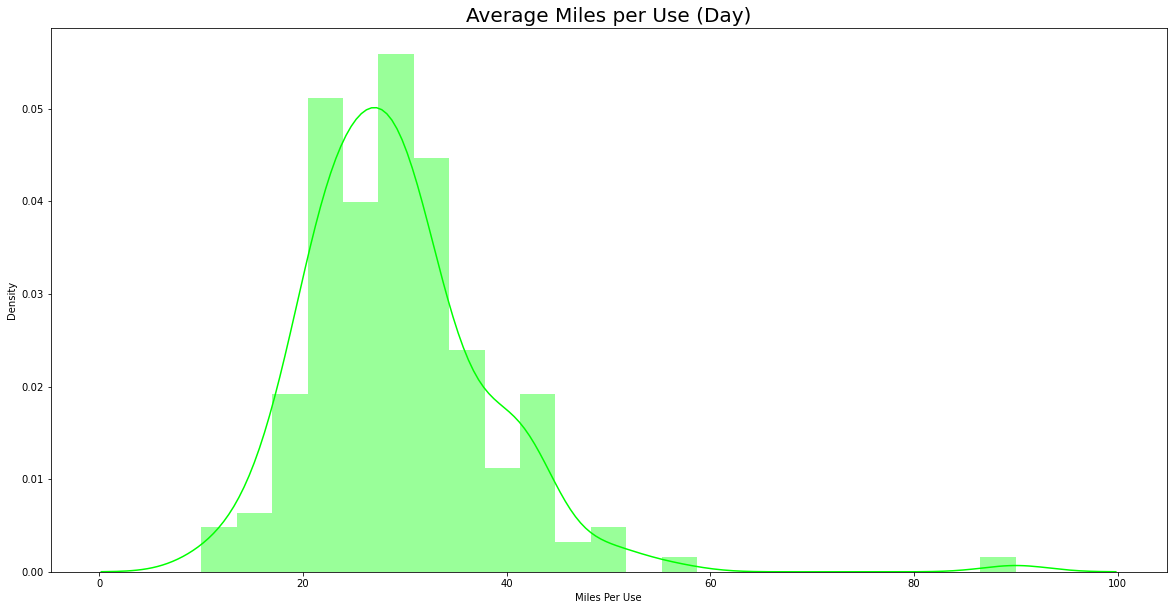

In [92]:
# Visually determine average Average Miles per Use (Day)

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.distplot(df['Miles Per Use'],kde=True,color='lime')
plt.title('Average Miles per Use (Day)', fontsize=20);


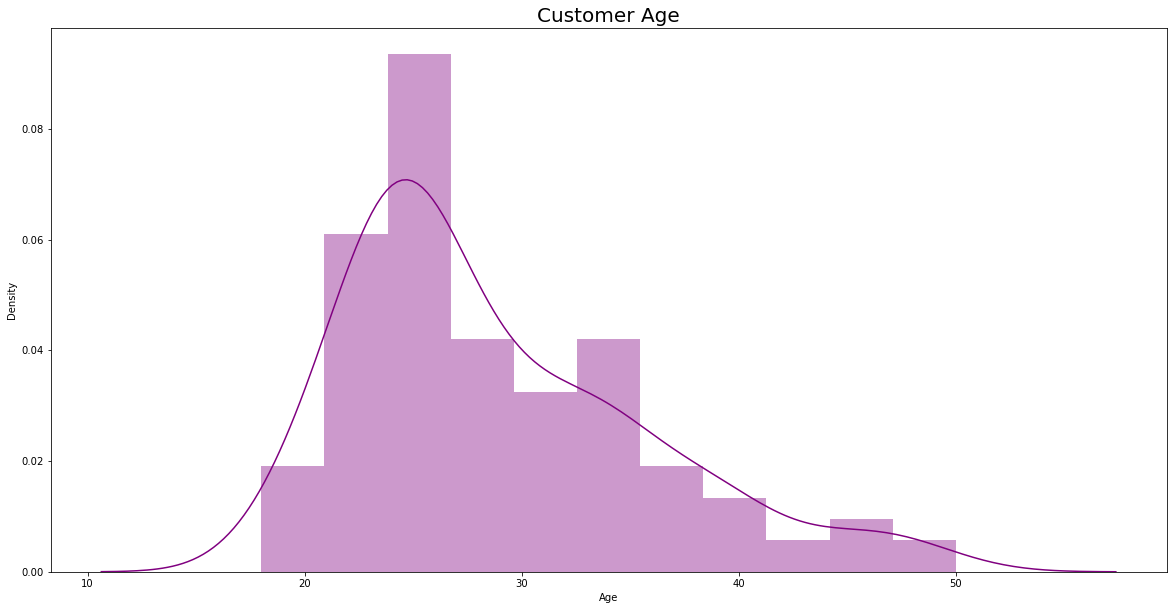

In [137]:
# Visually determine average Age

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.distplot(df['Age'],kde=True,color='Purple')
plt.title('Customer Age', fontsize=20);

In [94]:
# Compare the Weekly Usage by average Age Groups (specifically average ages using the products 3-4 times a week)

df.groupby(by='Usage')['Age'].mean().sort_values(ascending=False)

Usage
6    29.571429
5    29.058824
3    28.985507
4    28.538462
7    28.500000
2    28.484848
Name: Age, dtype: float64

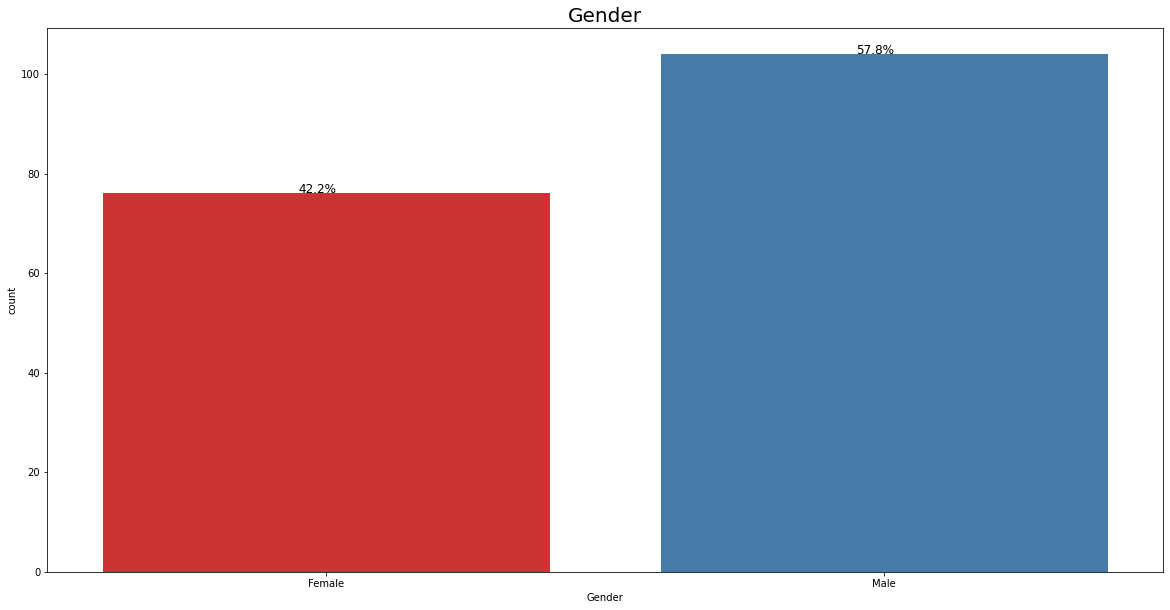

In [135]:
# Plot a count of Products purchase by Gender

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
ax=sns.countplot(df['Gender'],palette="Set1")
plt.title('Gender', fontsize=20);
bar_perc(ax,df['Gender']) # Include the percentage of each bar as a total

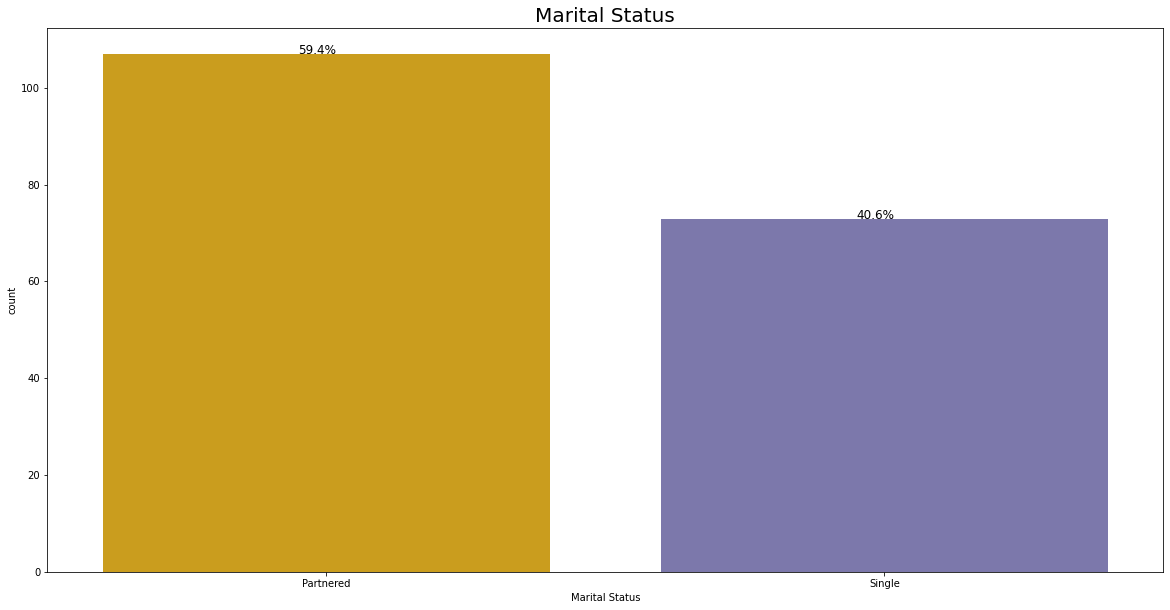

In [139]:
# Plot a count of Products purchase by Gender

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
ax=sns.countplot(df['MaritalStatus'],palette="Dark2_r")
plt.xlabel('Marital Status')
plt.title('Marital Status', fontsize=20);
bar_perc(ax,df['MaritalStatus']) # Include the percentage of each bar as a total


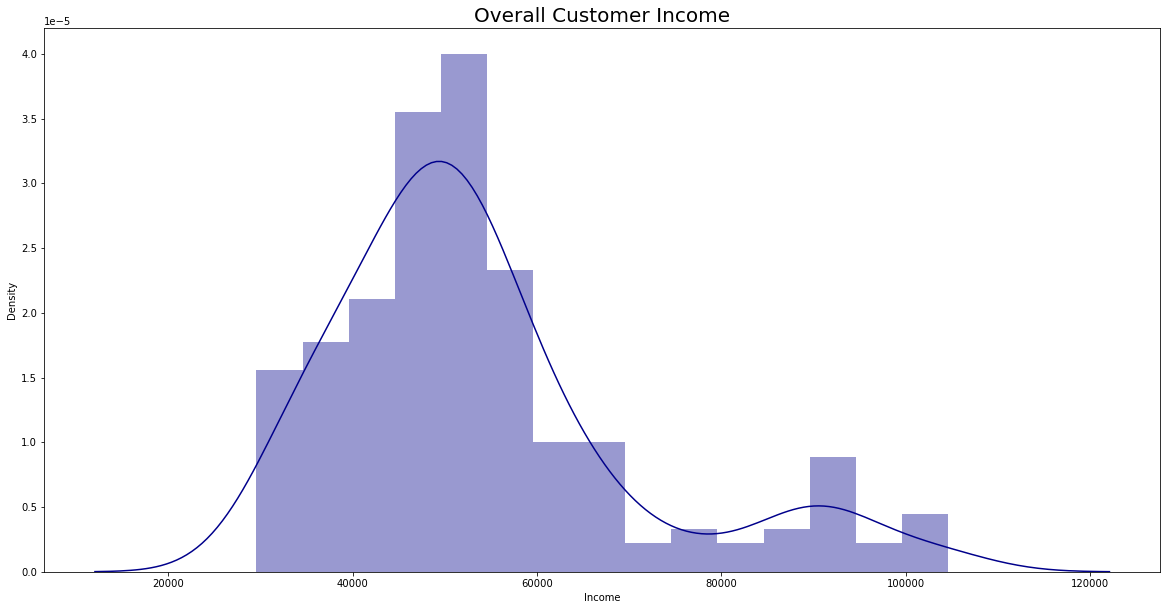

In [142]:
# Visually determine average Income

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.distplot(df['Income'],kde=True,color='DarkBlue')
plt.title('Overall Customer Income', fontsize=20);

### Observations

- Customers are relatively young overall, with the **average customer aged 29 years, with a median age of 26 years**
    - 75% of customers aged between 18 and 33 years
- 58% of the dataset is comprised of males
- Around 60% of the customers featured are married/partnered
- The median Fitness score is a 3 with 75% of the dataset at scoring 4 or less
    - **Most customers fall within average/slightly above average fitness on a scale of 1-5**
- The median Usage (Weekly) is a 3, with a range of 2 to 7 days and 75% of the dataset at 4 or less days.
    - **Increased usage past 4 days appears unlikely** for the bulk of current, and possibly future, customers
    - Further analysis is required to confirm this assumption or determine possible areas of improvement if not the case
- **The median average miles ran per workout is around 31 miles**, with 75% of customers running around 29 miles (115/4) per workout.
- The median income is just over \\$50k, with **75\% of customers earning \\$59k or less**, and a gap of only \\$14k between 25\% and 75\% of all customers
     - The mean income is just under \\$54k and, although higher by \\$4k vs. the median income, could indicate a relatively even data distribution (no major skewedness in data)

In [98]:
# Determining strongest points of correlation across datset

Correlation=df.corr()
Correlation

,Age,Education,Usage,Income,Miles,Miles Per Use
Age,1.000000,0.280496,0.015064,0.513414,0.036618,0.016206
Education,0.280496,1.000000,0.395155,0.625827,0.307284,0.077187
Usage,0.015064,0.395155,1.000000,0.519537,0.759130,0.158136
Income,0.513414,0.625827,0.519537,1.000000,0.543473,0.274710
Miles,0.036618,0.307284,0.759130,0.543473,1.000000,0.736015
Miles Per Use,0.016206,0.077187,0.158136,0.274710,0.736015,1.000000


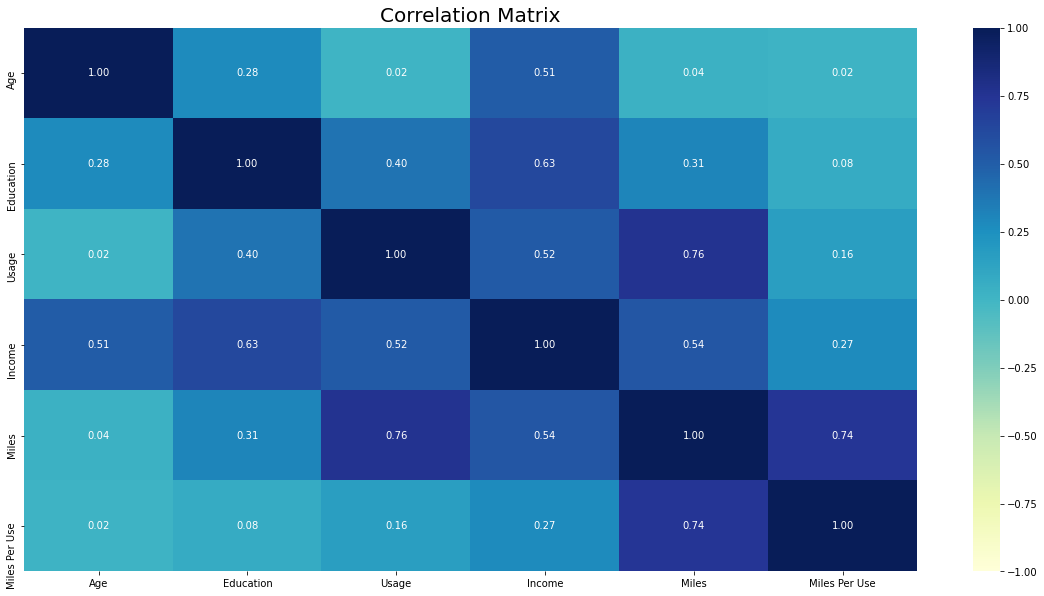

In [99]:
# Create a heatmap to better identify areas of highest correlation to focus our analysis on

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.heatmap(Correlation, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Correlation Matrix', fontsize=20);

### Observations
The strongest correlations (descending order) are:
 - **Miles** ran per week and **Fitness level**
 - **Miles** ran per week and **Usage**
 - **Income Earned** and **Education** (years studied)
 - **Income Earned** and **Age** 
 
The relationships between the above mentioned fields are obvious in nature and probably won't provide much beneficial insight
- The higher the miles ran per week, the higher the usage time required and the better one's fitness level on average.
- Usually, the higher the education studied/earned and the higher the age of an income earner would contribute towards higher income.
    - There are obviously anomalies or outliers to these assumptions, however the main focus is determining their effect on products purchased
- **Further, visual, analysis should be performed however, to confirm that these relationships can be ignored for this review**


<Figure size 1440x720 with 0 Axes>

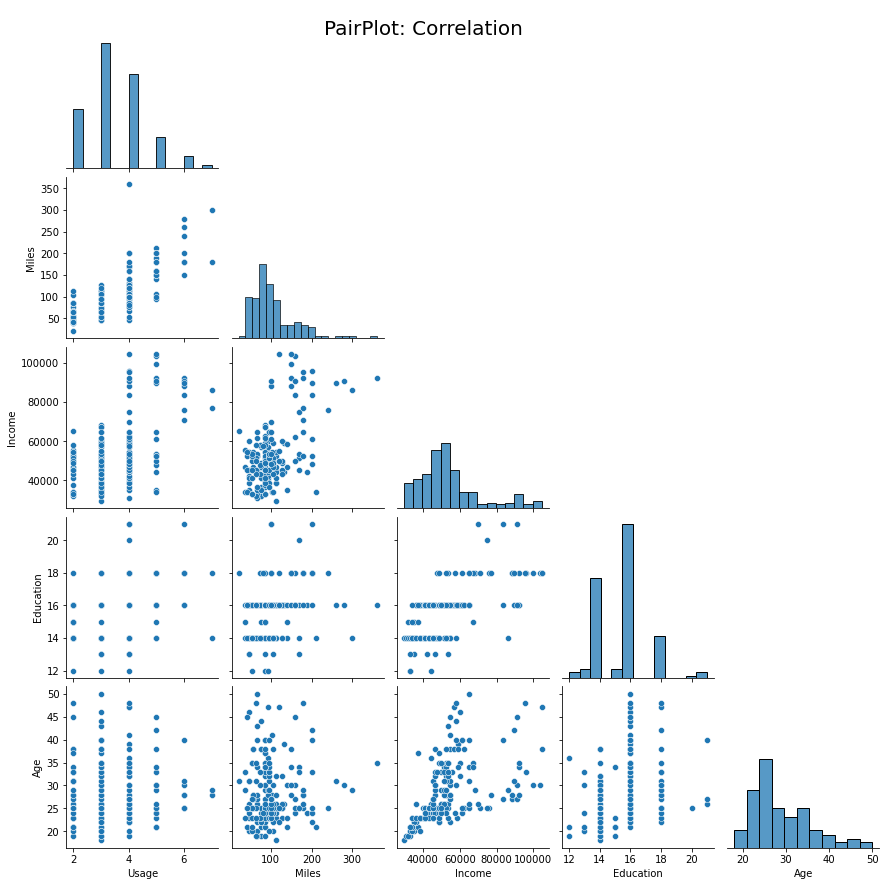

In [100]:
# Use a pairplot to summarize general trends amongst the 6 datapoints mentioned above
# Confirm general correlation, visually, as summarized above

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.pairplot(df[['Fitness','Usage','Miles','Income','Education','Age']],corner=True)
plt.title('PairPlot: Correlation', fontsize=20, x=-2, y=5);

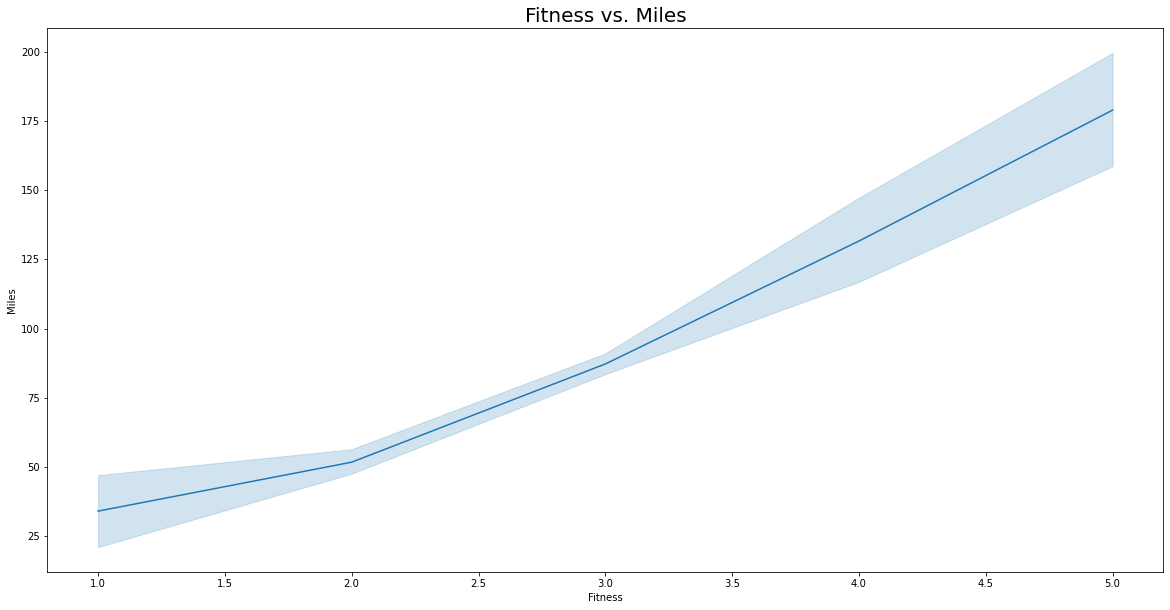

In [101]:
# Visually confirm positive correlation between Miles ran per week and Fitness Level

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.lineplot(x='Fitness',y='Miles',data=df, ci=95, estimator='mean')
plt.title('Fitness vs. Miles', fontsize=20);

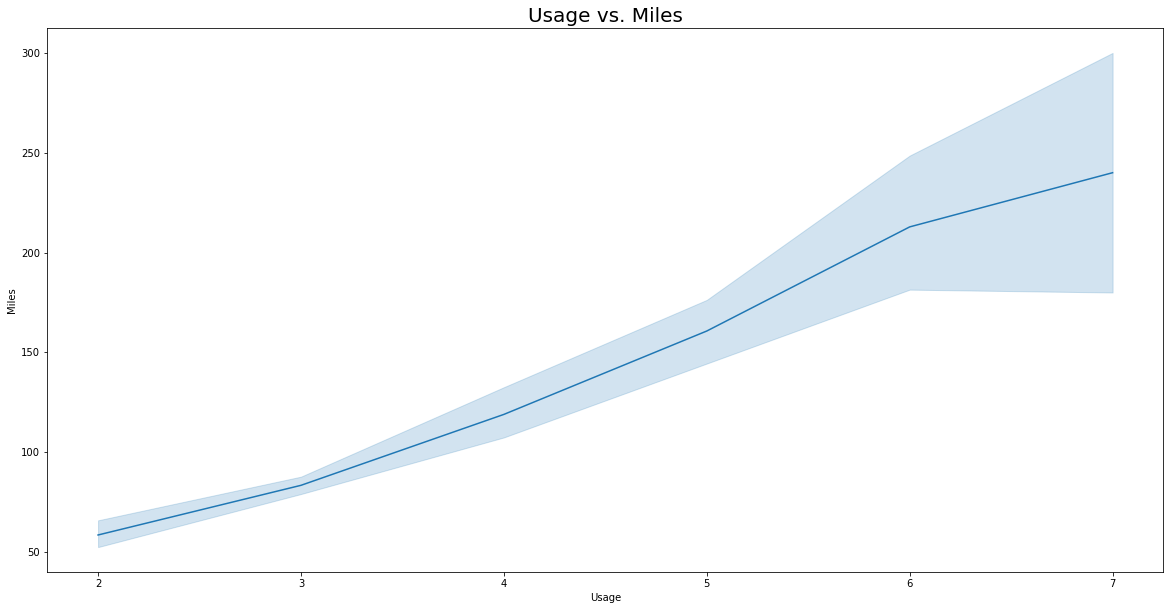

In [102]:
# Visually confirm positive correlation between Miles ran per week and Usage per week

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.lineplot(x='Usage',y='Miles',data=df, ci=95, estimator='mean')
plt.title('Usage vs. Miles', fontsize=20);

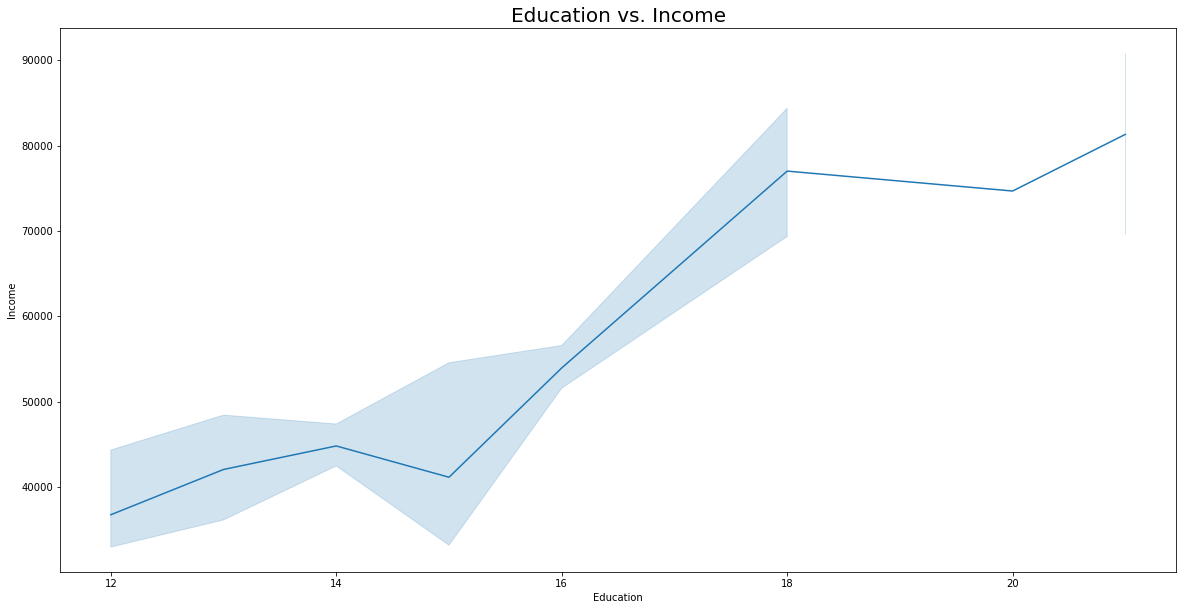

In [103]:
# Visually confirm positive correlation between Income and Education (Years)

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.lineplot(x='Education',y='Income',data=df, ci=95, estimator='mean')
plt.title('Education vs. Income', fontsize=20);

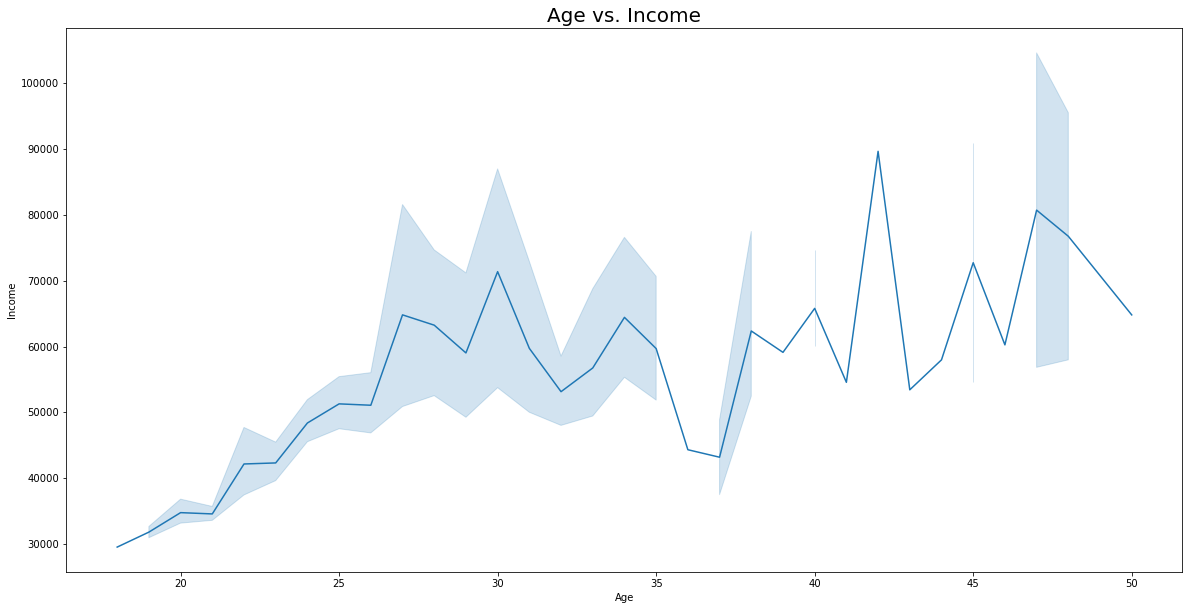

In [104]:
# Visually confirm positive correlation between Income and Age

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.lineplot(x='Age',y='Income',data=df, ci=95, estimator='mean')
plt.title('Age vs. Income', fontsize=20);

### Observations
- Fitness and Usage show a positive correlation to Miles travelled through to around 180 to 235 miles ran per week, respectively
- Education and Age how a less drastic positive correlation to Income Earned, with occasional anomalies to the overall trend
    - A positive linear regression is still apparent in both cases, however
    
Next steps are to determine the exact relationship the different numerical, plus additional categorical, data have towards product purchase mix.

In [105]:
# Calculate exact Product % splits - should match Profile Report

prod1=round(df['Product'][df['Product']=='TM195'].count()/df['Product'].count()*100,1) # Top Product % of Total Products
print('Product TM195: {}% '.format(prod1))

prod2=round(df['Product'][df['Product']=='TM498'].count()/df['Product'].count()*100,1) # Top Product % of Total Products
print('Product TM498: {}%'.format(prod2))

prod3=round(df['Product'][df['Product']=='TM798'].count()/df['Product'].count()*100,1) # Top Product % of Total Products
print('Product TM798: {}%'.format(prod3))

Product TM195: 44.4% 
Product TM498: 33.3%
Product TM798: 22.2%


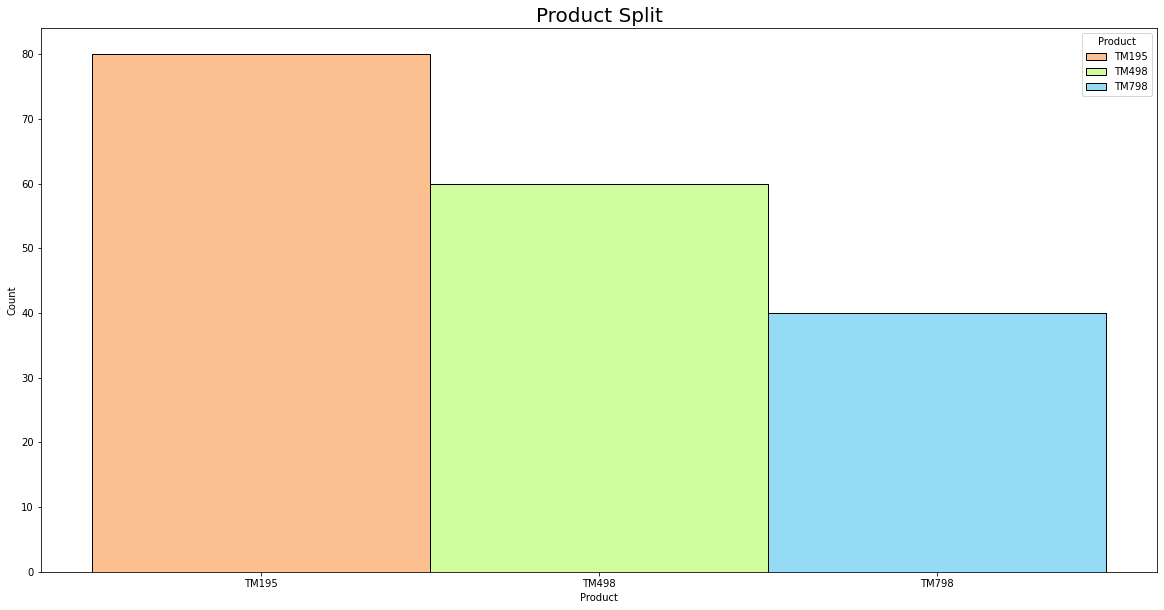

In [106]:
# Look at the breakout of products purchased, by count (x/180 total)
# Confirm average % split of products vs. calculations above

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.histplot(x='Product',data=df, hue='Product', palette='turbo_r') # Hue included for visual color separation of products
plt.title('Product Split', fontsize=20);

### Observations
The TM195 is the most popular product purchased (44.4%), followed by the TM498 (33.4%), then the TM798 (22.2%)

There could be other factors, such as Income, Age, Gender, Marital Status, etc. affecting the popularity of a given product.

In [107]:
# Look at all columns/possible data points to graph Categorical and Numerical data

df.columns 

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Miles Per Use'],
      dtype='object')

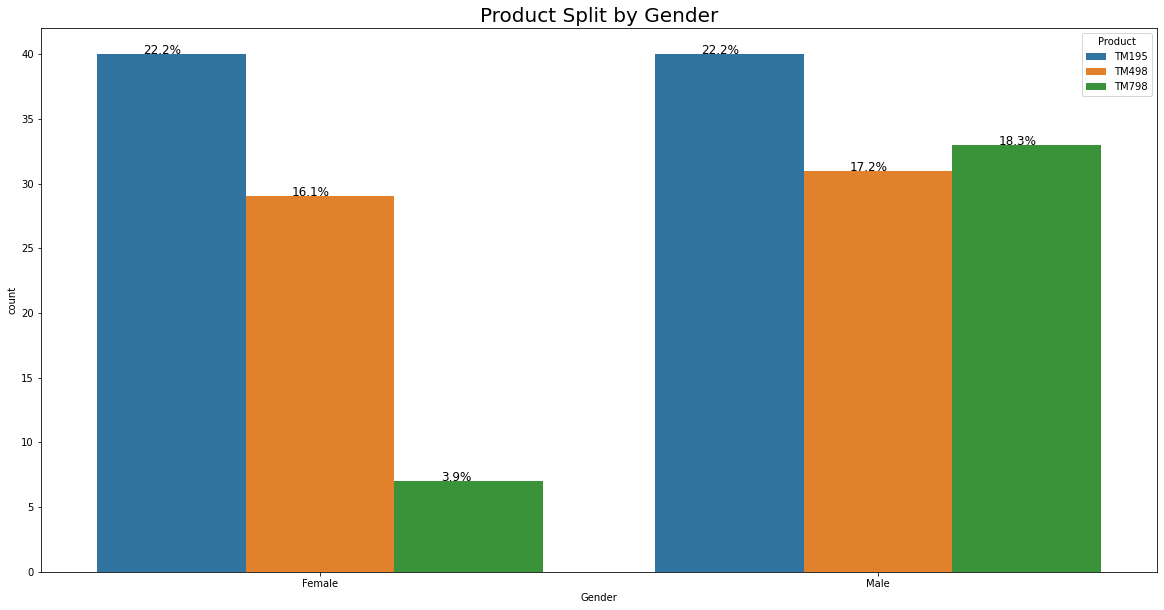

In [143]:
# Plot a count of Products purchase by Gender

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
ax=sns.countplot(df['Gender'],hue=df['Product'])
plt.title('Product Split by Gender', fontsize=20);
bar_perc(ax,df['Gender']) # Include the percentage of each bar as a total

In [109]:
# Create Gender/Product % splits for comparison to visuals above

TM195Male=round(df['Product'][df['Gender']=='Male'][df['Product']=='TM195'].count()/df['Product'][df['Product']=='TM195'].count()*100,)
TM195Female=round(df['Product'][df['Gender']=='Female'][df['Product']=='TM195'].count()/df['Product'][df['Product']=='TM195'].count()*100,)

TM498Male=round(df['Product'][df['Gender']=='Male'][df['Product']=='TM498'].count()/df['Product'][df['Product']=='TM498'].count()*100,)
TM498Female=round(df['Product'][df['Gender']=='Female'][df['Product']=='TM498'].count()/df['Product'][df['Product']=='TM498'].count()*100,)

TM798Male=round(df['Product'][df['Gender']=='Male'][df['Product']=='TM798'].count()/df['Product'][df['Product']=='TM798'].count()*100,)
TM798Female=round(df['Product'][df['Gender']=='Female'][df['Product']=='TM798'].count()/df['Product'][df['Product']=='TM798'].count()*100,)

# Group all Gender/Product Splits into list - examine list results and compare against visualization above

Gender_Split=[TM195Male,TM195Female,TM498Male,TM498Female,TM798Male,TM798Female]

Gender_Split

[50, 50, 52, 48, 82, 18]

### Observations
Product purchases, by gender, are split as follows:
 - TM195: 50% Male, 50% Female
 - TM498: 52% Male, 48% Female
 - TM798: 82% Male, 18% Female
 
The **TM195 and TM498** have a relatively **even split by gender**, whereas the **TM708 is heavily skewed towards Males**.

In [110]:
# Calculate the split of Single/Married customers - should match Profile Report

Single=round(df['MaritalStatus'][df['MaritalStatus']=='Single'].count()/df['MaritalStatus'].count()*100,)
Partnered=round(df['MaritalStatus'][df['MaritalStatus']=='Partnered'].count()/df['MaritalStatus'].count()*100,)

MaritalSplit=[Single,Partnered]
MaritalSplit

[41, 59]

In [111]:
# Calculate the Mean Income of Single/Married customers & compare to overall average income

Singleinc=round(df['Income'][df['MaritalStatus']=='Single'].mean(),)
Marriedinc=round(df['Income'][df['MaritalStatus']=='Partnered'].mean(),)

IncSplit=[Singleinc,Marriedinc]
print(IncSplit)

Overallinc=df['Income'].mean()
print(Overallinc) # Married customers earned more than the Mean income whereas Single customers earned less

[50724, 55763]
53719.57777777778


In [112]:
# Compare the same trend above but now for the Median Income

Singleinc=round(df['Income'][df['MaritalStatus']=='Single'].median(),)
Marriedinc=round(df['Income'][df['MaritalStatus']=='Partnered'].median(),)

IncSplit=[Singleinc,Marriedinc]
print(IncSplit)

Overallinc=df['Income'].median()
print(Overallinc) # Married customers earned more than the Median income whereas Single customers earned Less

[48658, 52302]
50596.5


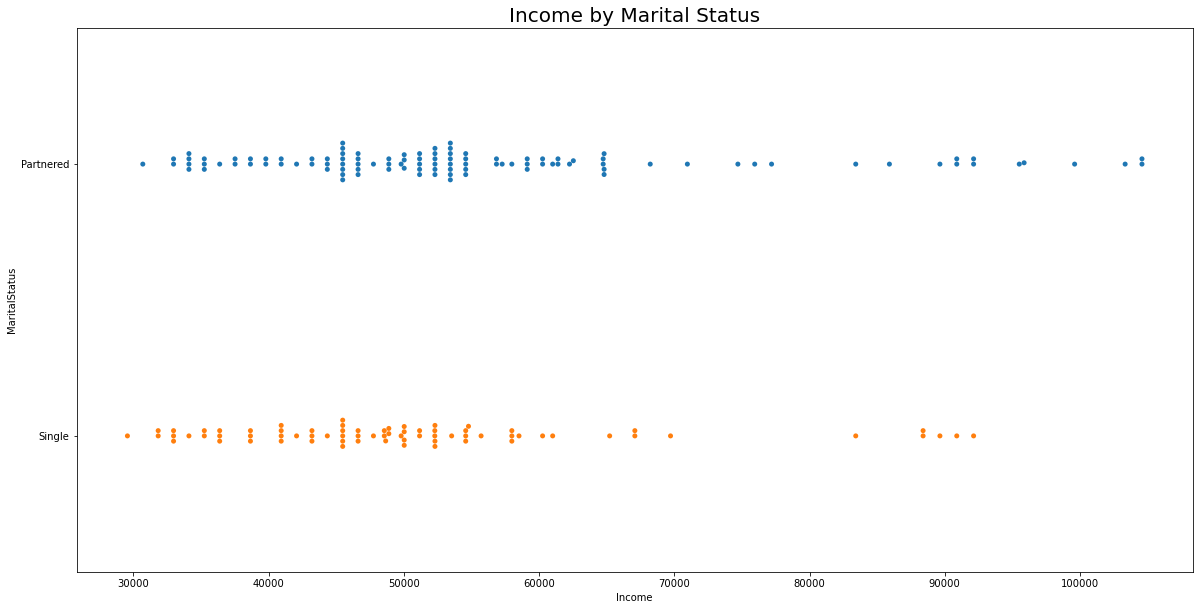

In [113]:
# Use swarmplot to visually compare income by Single vs. Married customers

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.swarmplot(df['Income'],df['MaritalStatus'])
plt.title('Income by Marital Status', fontsize=20);

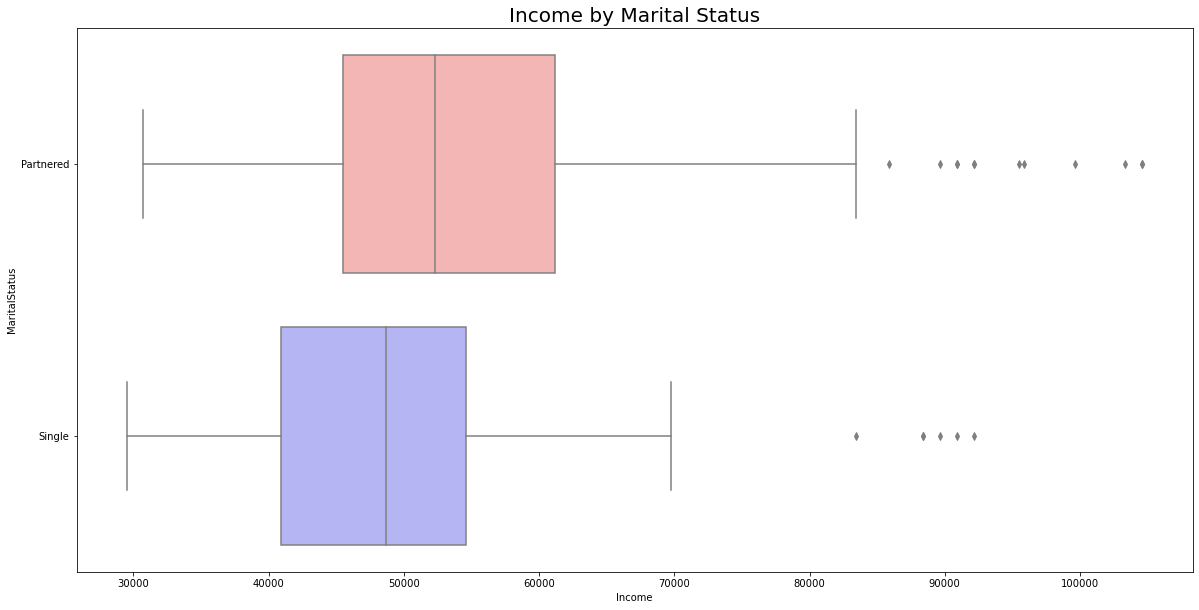

In [114]:
# Use boxplot to compare Median/IQR/Outliers of income for Single vs. Married customers

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.boxplot(df['Income'],df['MaritalStatus'], palette='bwr_r')
plt.title('Income by Marital Status', fontsize=20);

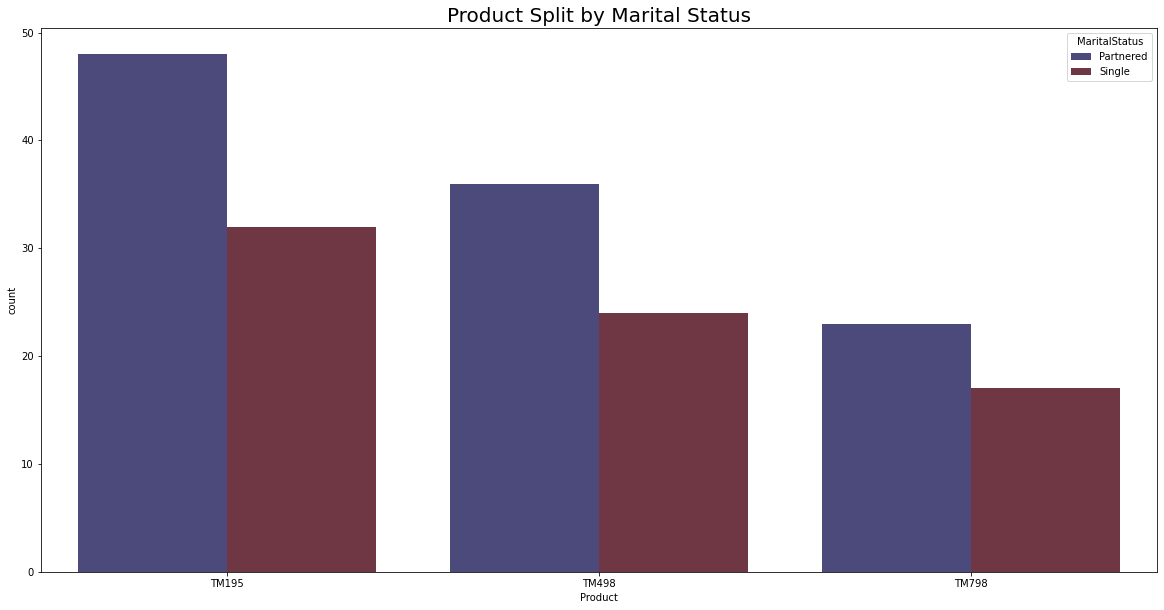

In [146]:
# Compare income for Single vs. Married customers by product split

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.countplot(df['Product'],hue=df['MaritalStatus'], palette='icefire')
plt.title('Product Split by Marital Status', fontsize=20);

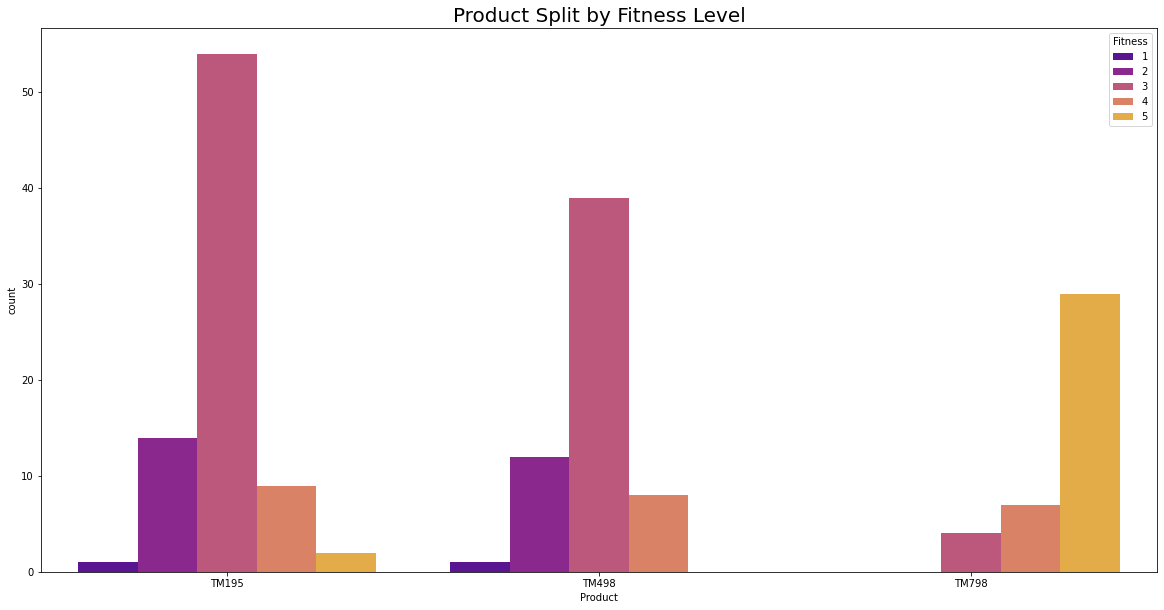

In [116]:
# Identify relationships between fitness levels and product ownership

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.countplot(df['Product'],hue=df['Fitness'], palette='plasma')
plt.title('Product Split by Fitness Level', fontsize=20);

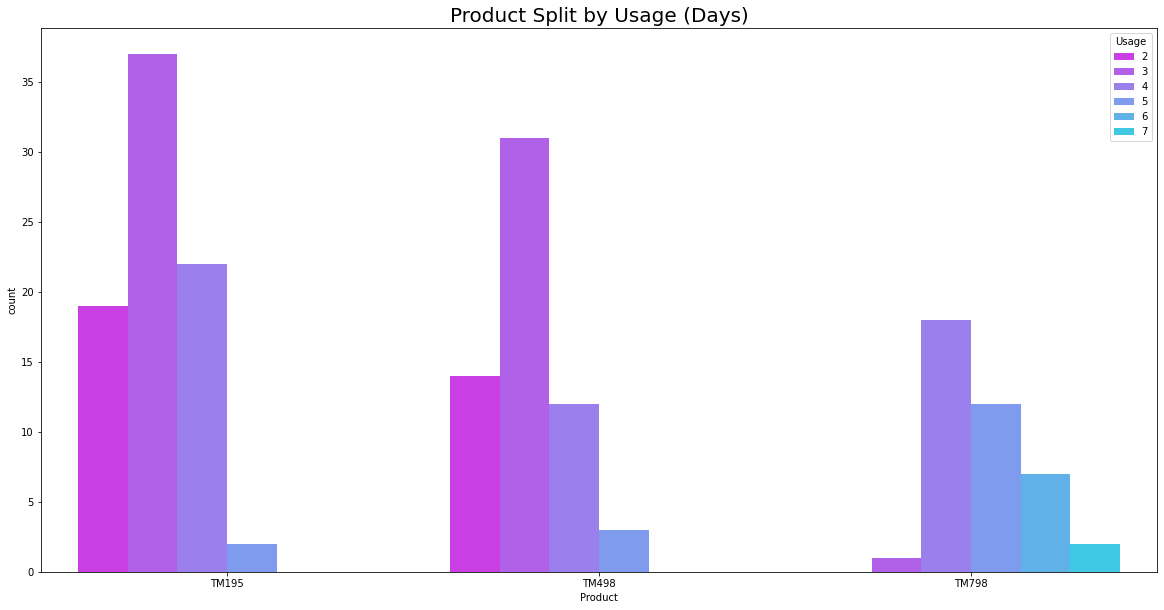

In [117]:
# Identify relationships between weekly usage and product ownership

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.countplot(df['Product'],hue=df['Usage'], palette='cool_r')
plt.title('Product Split by Usage (Days)', fontsize=20);

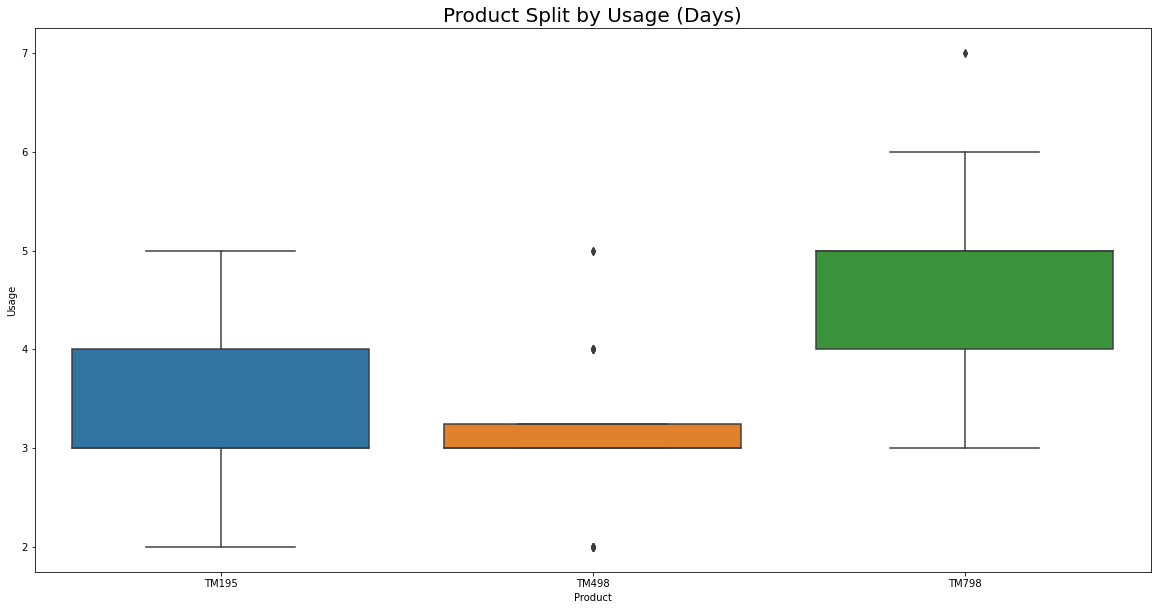

In [147]:
# Identify relationships between weekly usage and product ownership

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.boxplot(df['Product'],df['Usage'], orient='v') ;
plt.title('Product Split by Usage (Days)', fontsize=20);

In [119]:
# Create a new Degree column to segment customer education into 4 subcategories

Degree=np.arange(0,len(df['Education']),1)
df['Degree']=Degree

In [120]:
# Create a function to split classify each customer Education based on preset criteria below

def Education_Levels(Degree):
    
    count=0
    for j in df['Education']:
        if int(j) <=int(12):
            df['Degree'][count]='High School' # High School degree
            count += 1
           
        elif int(j) <=int(14):
            df['Degree'][count]='Associates' # Associates (2 year) degree
            count += 1
        elif int(j) <=int(17):
            df['Degree'][count]='Bachelors' # Bachelor (4 - 5 year) degree
            count += 1
            
        elif int(j) >=int(18):
            df['Degree'][count]='Doctorate +' # Doctorate (6 or more years)
            count += 1

                        
Education_Levels(df['Education']) # Run the function using customer Education as the input field  

In [121]:
df['Degree']=df.Degree.astype('category')  # Convert this column back to category

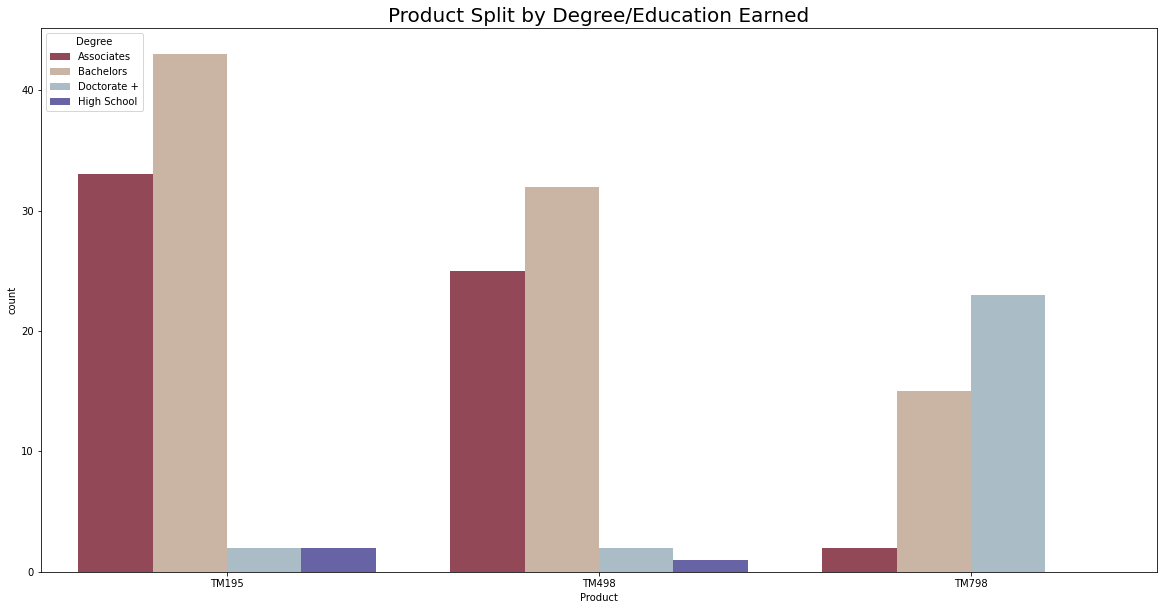

In [122]:
# Identify relationships between education (14 & 16 years for college educated) and product ownership

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.countplot(df['Product'],hue=df['Degree'], palette='twilight_shifted_r')
plt.title('Product Split by Degree/Education Earned', fontsize=20);

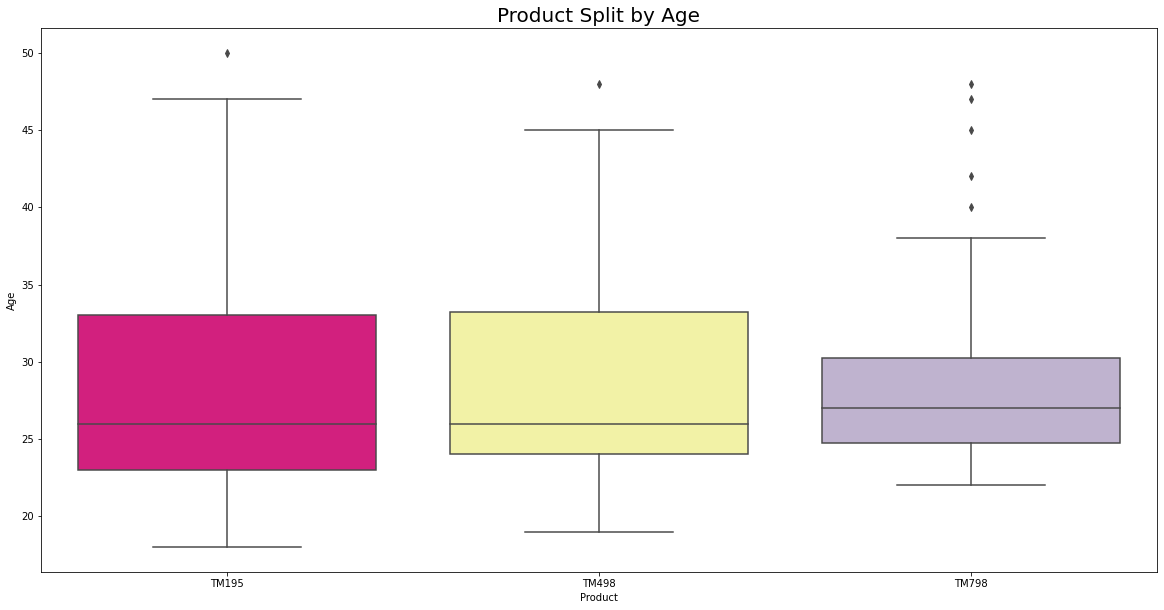

In [123]:
# Boxplot Look at the breakout of products purchased, by Age

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.boxplot(df['Product'],df['Age'], palette='Accent_r') # Boxplot Look at the breakout of products purchased, by Age
plt.title('Product Split by Age', fontsize=20);

In [124]:
# Calculate the IQR, for Age, of each product and summarize in a list

AgeIQRprod1=df['Age'][df['Product']=='TM195'].quantile(.75)- df['Age'][df['Product']=='TM195'].quantile(.25)
AgeIQRprod2=df['Age'][df['Product']=='TM498'].quantile(.75)- df['Age'][df['Product']=='TM498'].quantile(.25)
AgeIQRprod3=df['Age'][df['Product']=='TM798'].quantile(.75)- df['Age'][df['Product']=='TM798'].quantile(.25)

AgeIQR=[AgeIQRprod1,AgeIQRprod2,AgeIQRprod3]

AgeIQR

[10.0, 9.25, 5.5]

### Observations

- There is a roughly **60/40 split between Married vs. Single** customers in the dataset
- Married customers have a **higher mean (\\$56k vs. \\$51k) and median (\\$52k vs. \\$48k) income**
- There is a higher income distribution (75th Quantile plus Outliers) amongst Married customers
- The median age amongst all three products appear to be very similar, in the 26-27 year range
    - The **TM798 has a much smaller IQR than the other two products (5.5 vs. roughly 10 years)**, meaning that the particular customer is within a more select grouping and somewhat younger
- Most customers who own either the TM195 or TM498 have at least an Associates or Bachelor's degree, whereas TM798 owners mostly have either a Bachelor's degree or Doctorate 

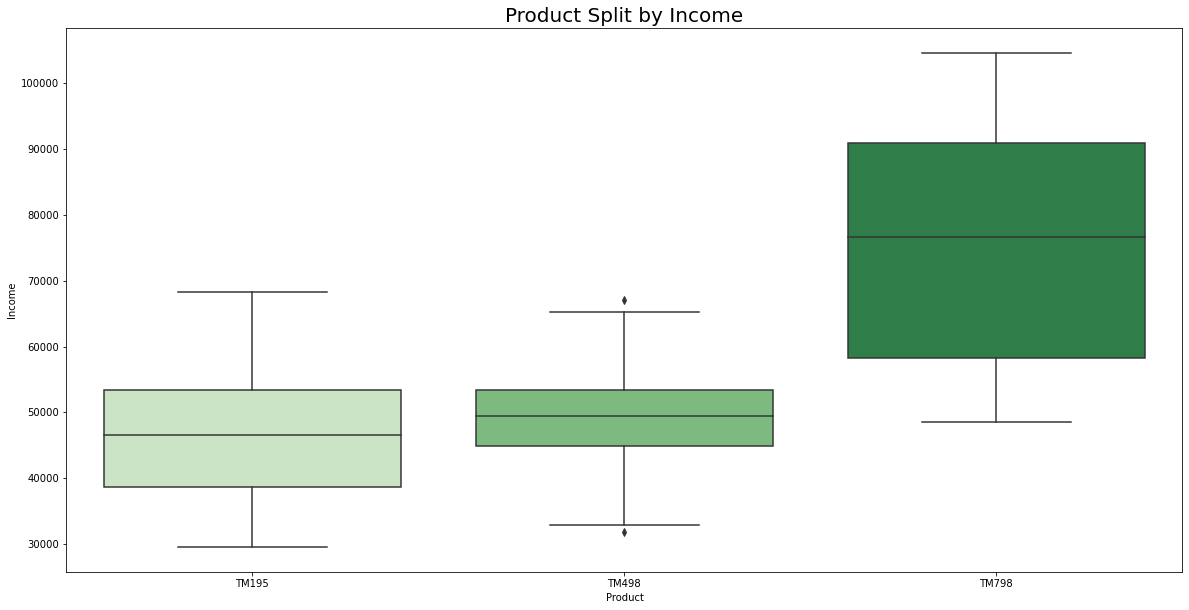

In [125]:
# Using a boxplot to look at the product owernship by income level (overall)

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.boxplot(df['Product'],df['Income'],palette='Greens')
plt.title('Product Split by Income', fontsize=20);

In [126]:
# Create a new column called Income_Group that will group the different customer income levels for a comparative view

Income_Group=np.arange(0,len(df['Income']),1)
df['Income_Group']=Income_Group

In [127]:
# Create a function to split classify each customer income based on preset criteria below

def Income_Groups(Income):
    
    count=0
    for j in df['Income']:
        if int(j) <=int(40000):
            df['Income_Group'][count]='Group 1' # Group 1=$0 - $40k
            count += 1
           
        elif int(j) <=int(60000):
            df['Income_Group'][count]='Group 2' # Group 2=$40k - $60k
            count += 1
            
        elif int(j) <=int(75000):
            df['Income_Group'][count]='Group 3' # Group 3=$60k - $75k
            count += 1
            
        elif int(j) >=int(75001):
            df['Income_Group'][count]='Group 4' # Group 4=$75k and above
            count += 1

                        
Income_Groups(df['Income']) # Run the function using customer income as the input field       

In [128]:
df['Income_Group'].describe() # Test that the function worked and correctly classifed all incomes into 4 unique groups

count         180
unique          4
top       Group 2
freq          106
Name: Income_Group, dtype: object

In [129]:
df['Income_Group']=df.Income_Group.astype('category') # Convert this column back to category

In [130]:
# Confirm that there are now 4 categories in the dataset and 9 total columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   Miles Per Use  180 non-null    int64   
 10  Degree         180 non-null    category
 11  Income_Group   180 non-null    category
dtypes: category(6), int64(6)
memory usage: 10.5 KB


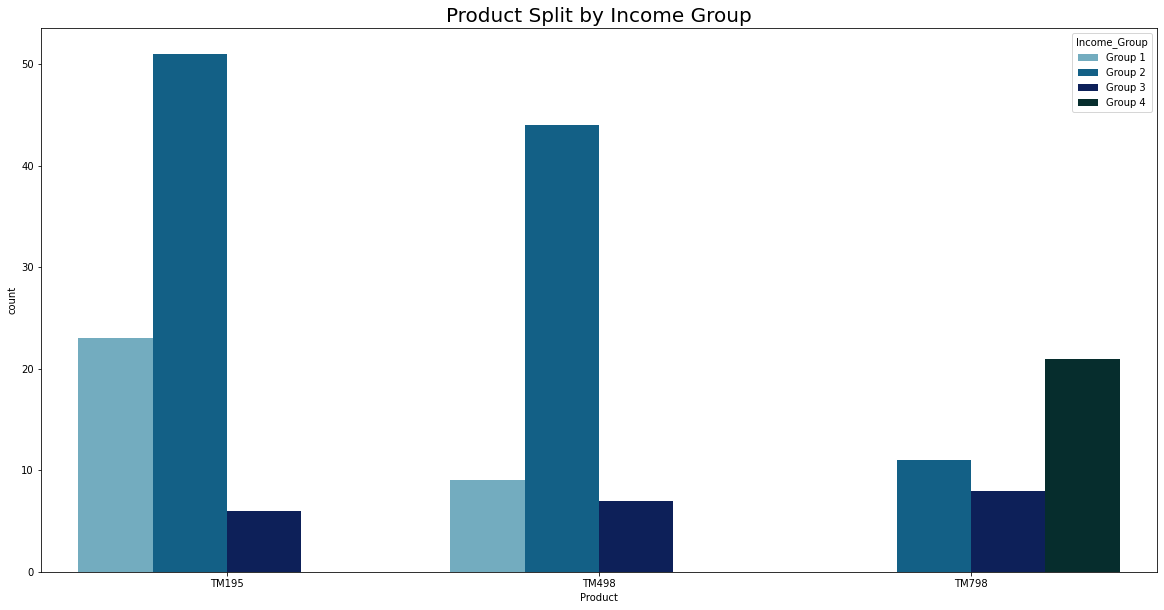

In [155]:
# Look at the breakout of products purchased (Countplot), by Income Group

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.countplot(df['Product'],hue=df['Income_Group'], palette='ocean_r')
plt.title('Product Split by Income Group', fontsize=20);

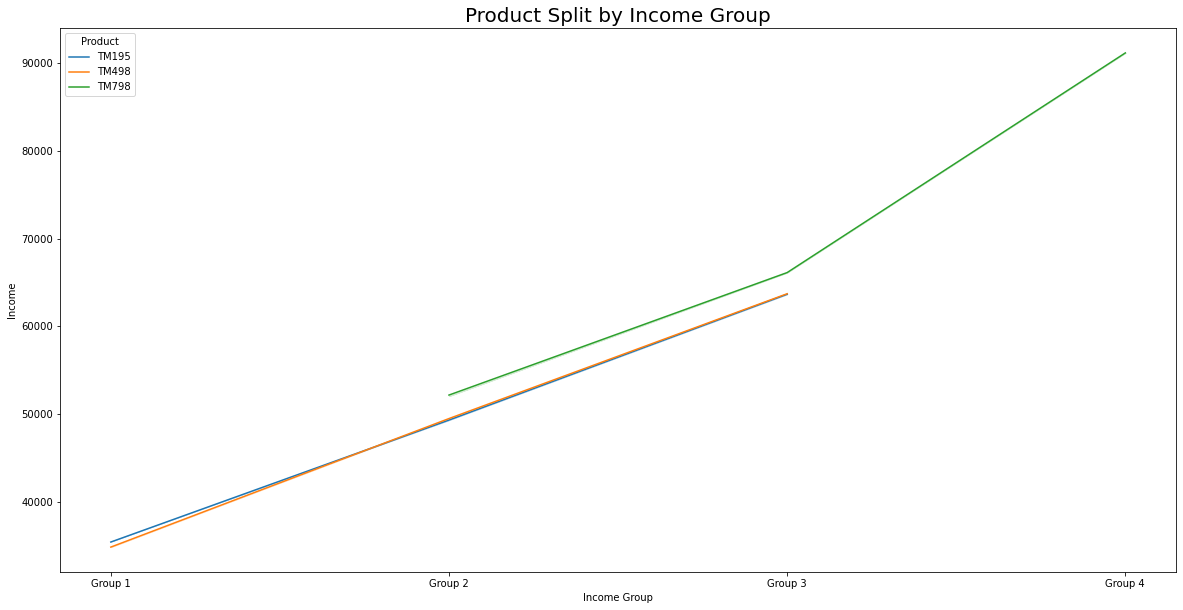

In [132]:
# Look at the breakout of products purchased (LinePlot), by Income Group

plt.figure(figsize=(20,10)) # Adjust figure to a larger view - assumed default to be 20,10 unless otherwise
sns.lineplot(x='Income_Group',y='Income',hue='Product',ci=0,data=df)
plt.xlabel('Income Group')
plt.title('Product Split by Income Group', fontsize=20);

### Observations

#### Income & Income Groups
- The customers purchasing the TM195 and TM498 products have a **similar median income of around \\$48k and \\$52k** respectively
    - The TM195 appears to be the most popular product for lower income earners, ranging from around \\$38k to \\$54k
    - The TM498 captures the upper half of the TM195 customer income range and appears to be the step up (slightly pricier) option
    - By comparison, the TM798 is well out of the income range of either the TM198 or TM498 (excluding outliers) and appears to the top of the line product most likely to be purchased by higher income earners
    
    
The separate income groupings confirm this split and offer additional insight:
- **Group 2 (incomes between \\$40k and \\$60k) making up the majority of purchases for both the TM195 and TM498 SKUs**
- Group 3 customers purchase roughly the same amount of all three products
- **Group 4 (earning \\$75k and up) make up the bulk of TM798 purchases** - double that of Group 2 and Group 3

# Final Results & Recommendations

### Customer Product Profiles:

##### TM195:
- Likely to be **either gender**
- Most likely to **use the product 3 days a week** on average
- Will have an **income range of: \\$38k to \\$54k**, excluding outliers
- Majority will be in the **age range of 23 to 33**, excluding outliers
- Most likely to have already **earned an Associates or Bachelor's degree**

***Although married customers make up larger share of purchases, Single customer ownership is substantial and should be equally targeted**

##### TM498:
- Likely to be **either gender**
- Most likely to **use the product 3 days a week** on average
- Will have an **income range of: \\$48k to \\$54k**, excluding outliers
- Majority will be in the **age range of 24 to 33**, excluding outliers
- Most likely to have already **earned an Associates or Bachelor's degree**

***Although married customers make up larger share of purchases, Single customer ownership is substantial and should be equally targeted**

##### TM798:
- Most likely to be **males of fitness level 5**
- **Most likely to use the product between of 4-5 days a week** on average, with some customers pushing the full 6-7 days a week
- Will have an **income range of: \\$57k to \\$92k**, excluding outliers
- Majority will be in the **age range of 25 to 30**, excluding outliers
- Most likely to have already **earned a Bachelor's degree or Doctorate**

***Although married customers make up larger share of purchases, Single customer ownership is substantial and should be equally targeted**

##### Overall:
- The **average customer age is 29 years**, with a median age of 26
    - Excluding outliers, the majority of customers fall within the range of 24 and 33
- Almost all customers have at least some college education
    - **30%** have at least 14 years (High School plus **Associates degree** (2+ years)
    - **47%** have at least 16 years (High School plus **Bachelor's degree** (4+ years)
- There is a greater distribution of customers that are:
    - **Male** vs. Female (58%/42%)
    - **Partnered (Married)** vs. Single (59%/41%)
- The majority of customers use the product/s **3 (38%) to 4 (29%) days a week**
    - Over half the customers in the dataset **(54%) are at an average fitness level of 3**
    - **Average weekly miles ran is around 104**, with a median of 94 and the lower 1st quantile running at least 66 miles a week
    - Customers run an **average of 29 miles per use (day)**, with the majority of customers running between 23 and 33 miles per use - excluding outliers
- Customer Income has a **mean of \\$53.7k and median of \\$50.6k**
    - Excluding outliers, the majority of customers have incomes in the range of \\$44k to \\$59k

### Additional Insights & Recommendations:
- There is an opportunity to **better target and cater to females for the TM798** which is largely skewed towards males
- From a fitness standpoint, **product marketing needs to be segmented into two areas:**
    - Average fitness (geared towards the TM195 and TM498 models)
    - Above-average to high fitness (specifically focused around the TM798)
- Although the majority of customers are Partnered and have higher incomes on average, **Single customers still have sufficient spending power**, and product ownership, to **warrant better targeting by the company**
- **The TM498 is closely marketed to similar customers as the TM195**, based on income levels
- This has **created an income gap between the customers targeted for the TM498 vs. TM798**, while also creating an inefficient overlap with customers buying TM195. 
    - There is an opportunity to increase the pricing and adjust the product marketing for the TM498 to better segment the 3 products across their customer base 